# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [5]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
# DF shape, number of rows, number of columns
df_data.shape

(962, 16)

In [7]:
# Column names
print(df_data.columns)

# Type of data in columns
df_data.dtypes

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')


year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

In [8]:
# See some of the examples
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [9]:
# Year of first Nobel prize
df_data.year.min()

1901

In [10]:
# Latest year of Nobel prize in data set
df_data.year.max()

2020

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [11]:
# Check for duplicates
print(f'Any duplicates? {df_data.duplicated().values.any()}') # --> False means there are no duplicates

Any duplicates? False


### Check for NaN Values

In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [13]:
print(f'Any NaN values among the data? {df_data.isna().values.any()}')

Any NaN values among the data? True


In [14]:
# Count of the NaN values per column using
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [15]:
# Filtering on the NaN values in the birth date column we see that we get back a bunch of organisations, like the UN or the Red Cross. 
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [16]:
# When we look at for rows where the organization_name column has no value, we also see that many prizes went to people who were not affiliated with a university or research institute. This includes many of the Literature and Peace prize winners.
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]


,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [17]:
# Use pandas to convert the birth_date to a Datetime object
df_data.birth_date = pd.to_datetime(df_data.birth_date)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [18]:
# Creating new column with share percentage
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator

In [19]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [20]:
# Create chart using value_counts()
biology = df_data.sex.value_counts()

print(biology)

fig = px.pie(
    labels = biology,
    values = biology.values,
    title = 'Percentage of Male vs. Female Winners',
    names = biology.index,
    hole = 0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

sex
Male      876
Female     58
Name: count, dtype: int64


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [21]:
# first 3 female Nobel laureates
df_data[df_data.sex == 'Female'].sort_values("year", ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [22]:
# Search for duplicates in the full_name column
is_winner = df_data.duplicated(subset=["full_name"], keep=False)

multiple_winners = df_data[is_winner].sort_values("full_name", ascending=True)
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')
multiple_winners.full_name.unique()

There are 6 winners who were awarded the prize more than once.


array(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype=object)

In [23]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...
306,1958,Chemistry,Individual,Frederick Sanger
505,1980,Chemistry,Individual,Frederick Sanger
297,1956,Physics,Individual,John Bardeen
424,1972,Physics,Individual,John Bardeen
278,1954,Chemistry,Individual,Linus Carl Pauling
340,1962,Peace,Individual,Linus Carl Pauling
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [24]:
# Name of categories and number of categories
print(f"Number of categories: {df_data.category.nunique()}")
print(f"Name of categories: {df_data.category.unique()}")

Number of categories: 6
Name of categories: ['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics']


In [25]:
# Bar chart with number of prizes awarded by category
prize_per_category = df_data.category.value_counts()

v_bar  = px.bar(
    x = prize_per_category.index,
    y = prize_per_category,
    title = 'Number of Prizes Awarded per Category',
    color=prize_per_category.values,
    color_continuous_scale = "Aggrnyl",
)

v_bar.update_layout(
    xaxis_title = "Nobel Prize Category",
    yaxis_title = "Number of Prizes",
    coloraxis_showscale = False
)

v_bar.show()

In [26]:
# Number of Prizes Awarded per Category
prize_per_category

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [27]:
df_data[df_data.category == 'Economics'].sort_values('year').head()
# The economics prize is much newer. It was first awarded in 1969, compared to 1901 for physics.

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [28]:
# Create category, sex, prize table
cat_men_women = df_data.groupby(["category","sex"], as_index=False).agg({"prize": pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [29]:
v_bar_split = px.bar(
    x=cat_men_women.category,
    y=cat_men_women.prize,
    color=cat_men_women.sex,
    title="Number of Prizes Awarded per Category split by Men and Women"
)

v_bar_split.update_layout(
    xaxis_title = "Nobel Prize Category",
    yaxis_title = "Number of Prizes",
)

v_bar_split.show()


We see that overall the imbalance is pretty large with physics, economics, and chemistry. Women are somewhat more represented in categories of Medicine, Literature and Peace. Splitting bar charts like this is an incredibly powerful way to show a more granular picture.

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [46]:
# Number of prizes per year
priz_per_year = df_data.groupby("year", as_index=False).agg({"prize": pd.Series.count})
print(len(priz_per_year.year))
priz_per_year

117


,year,prize
0,1901,6
1,1902,7
2,1903,7
3,1904,6
4,1905,5
...,...,...
112,2016,11
113,2017,12
114,2018,13
115,2019,14


In [47]:
# Second solution that are used for plotting graph
prize_per_year2 = df_data.groupby(by='year').count().prize 
prize_per_year2


year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [57]:
# Calculate the 5-year moving average we use .rolling() and .mean() 
moving_avg = prize_per_year2.rolling(window=5).mean()

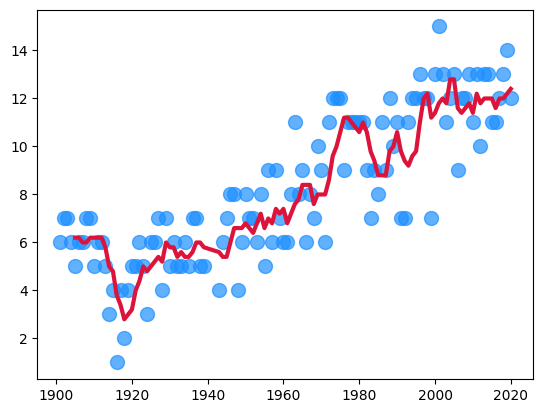

In [58]:
# Create scatter plot
plt.scatter(x=prize_per_year2.index, 
           y=prize_per_year2.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year2.index, 
        moving_avg.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

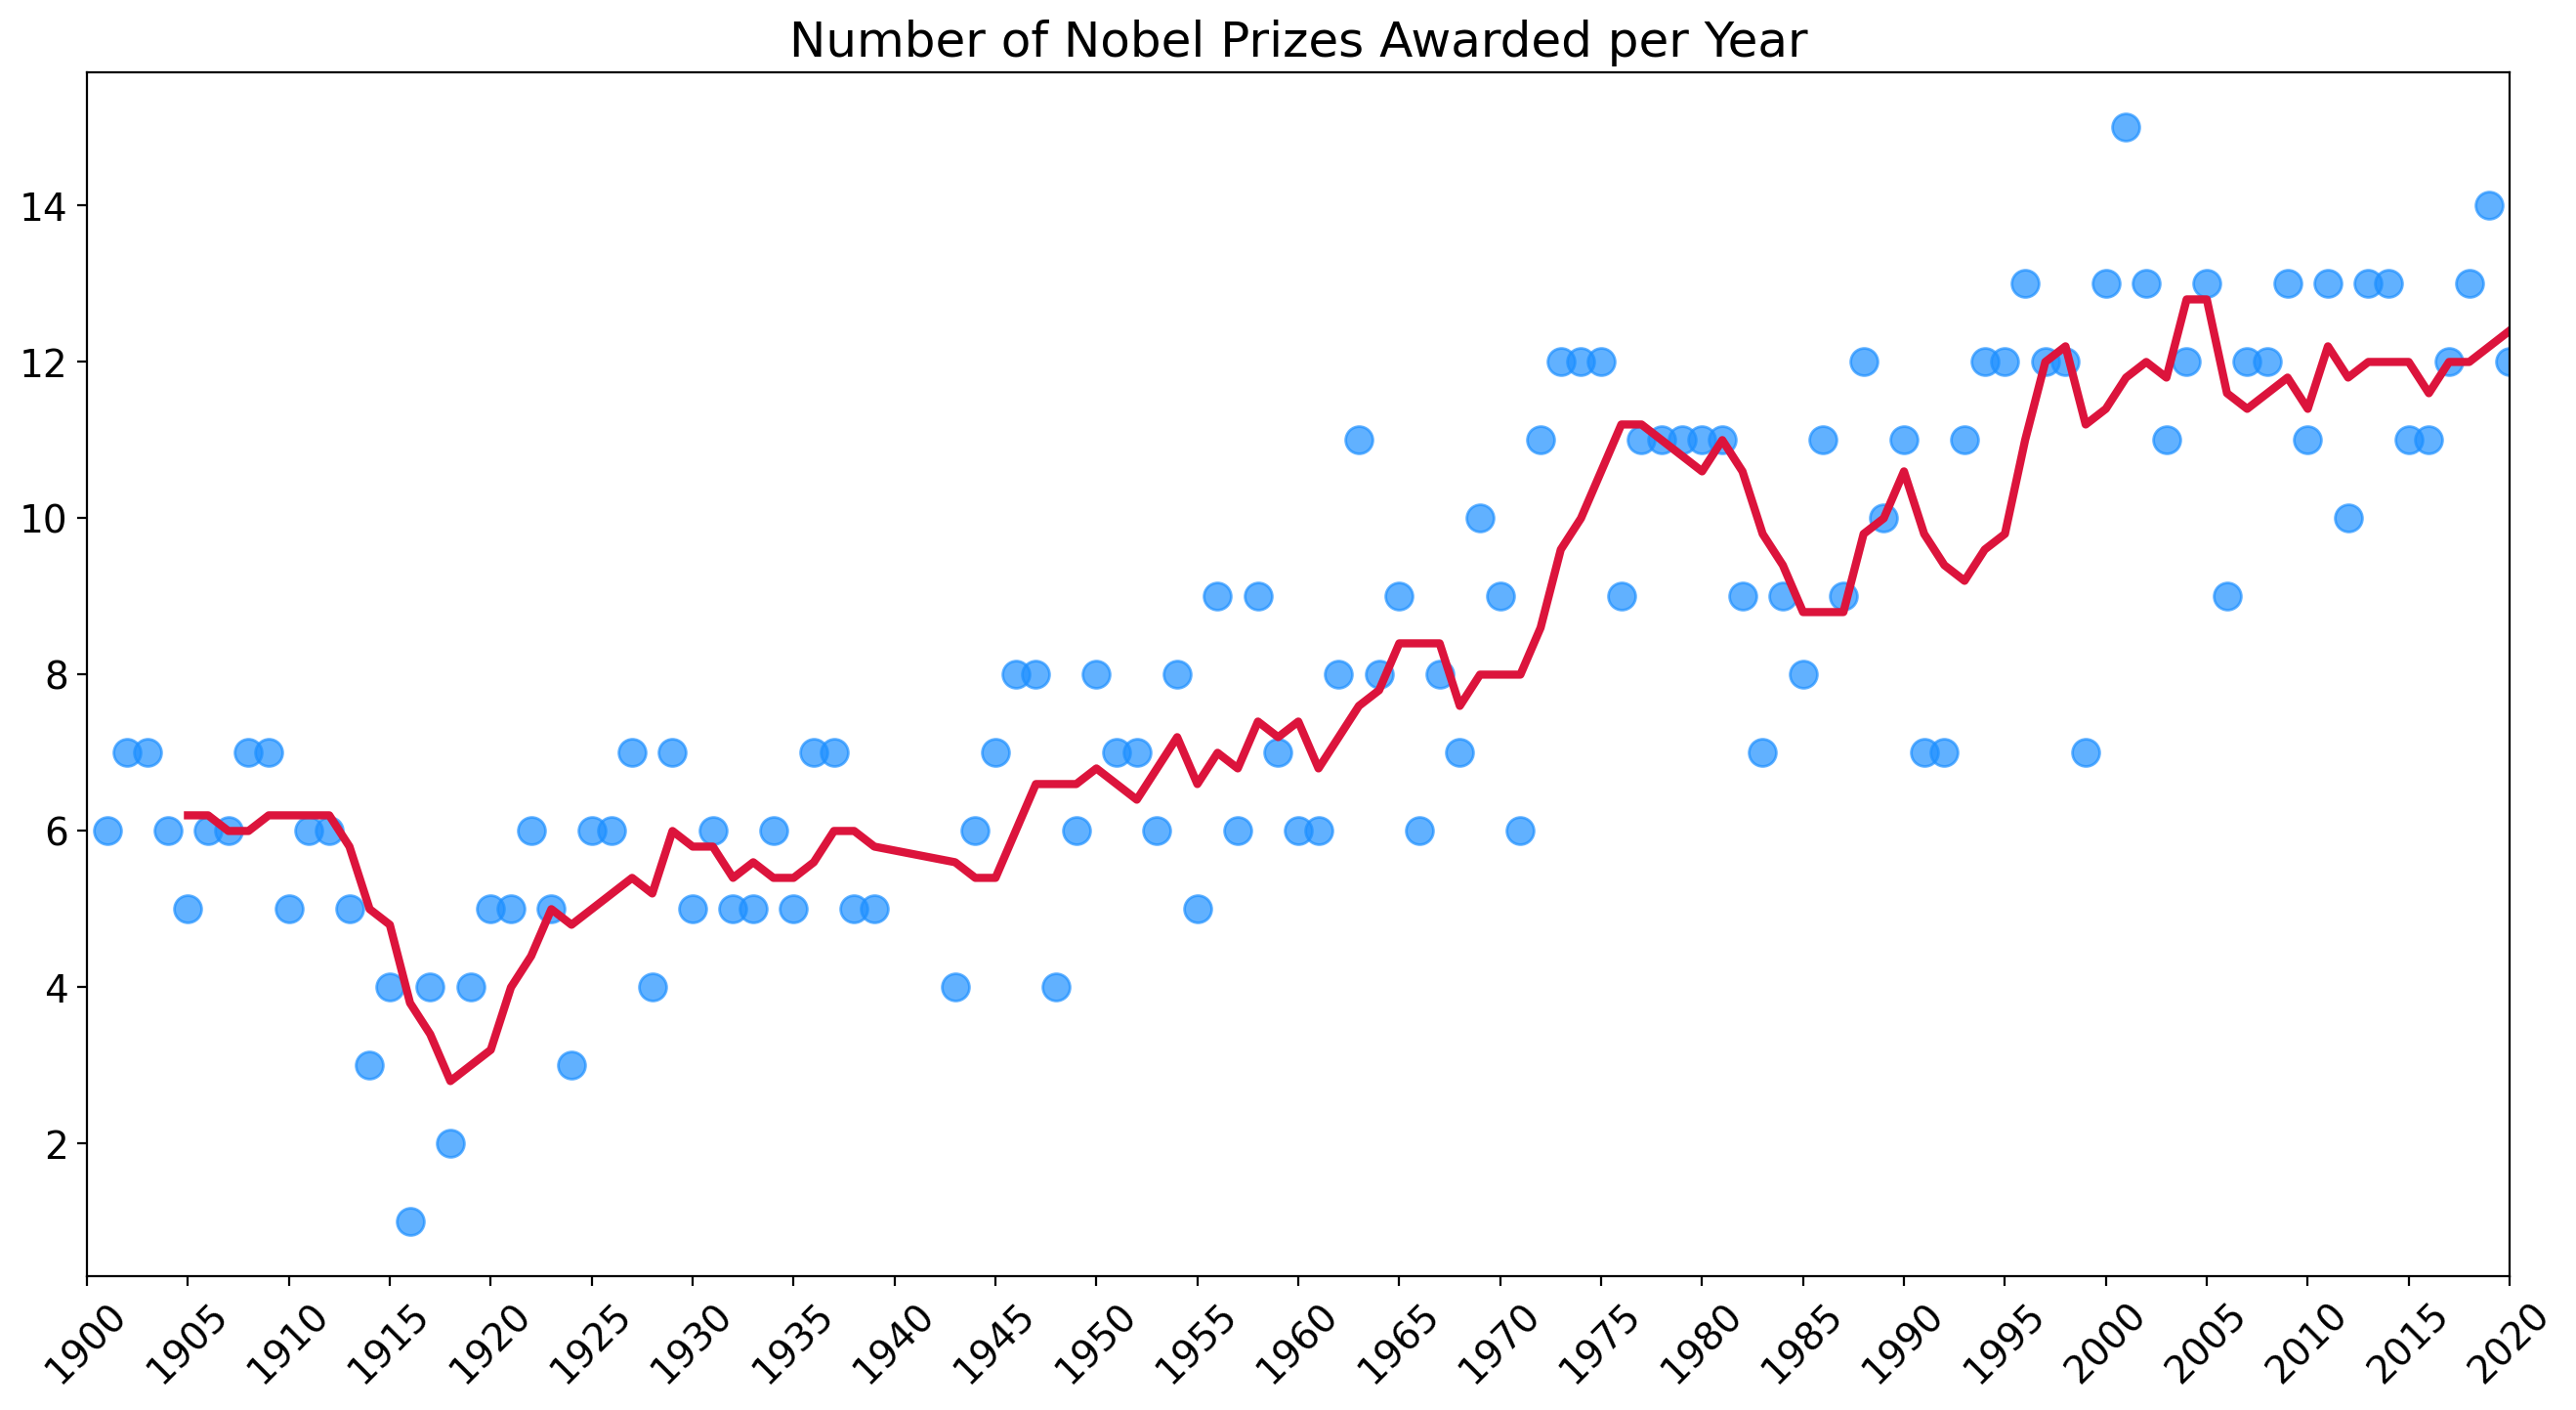

In [59]:
# Creating tick marks for each 5 year moving average
np.arange(1900, 2021, step=5)

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year2.index, 
           y=prize_per_year2.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year2.index, 
        moving_avg.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [61]:
# Avg prize share of the winners on a year by year basis
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()
yearly_avg_share

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00
...,...
2016,0.55
2017,0.50
2018,0.46


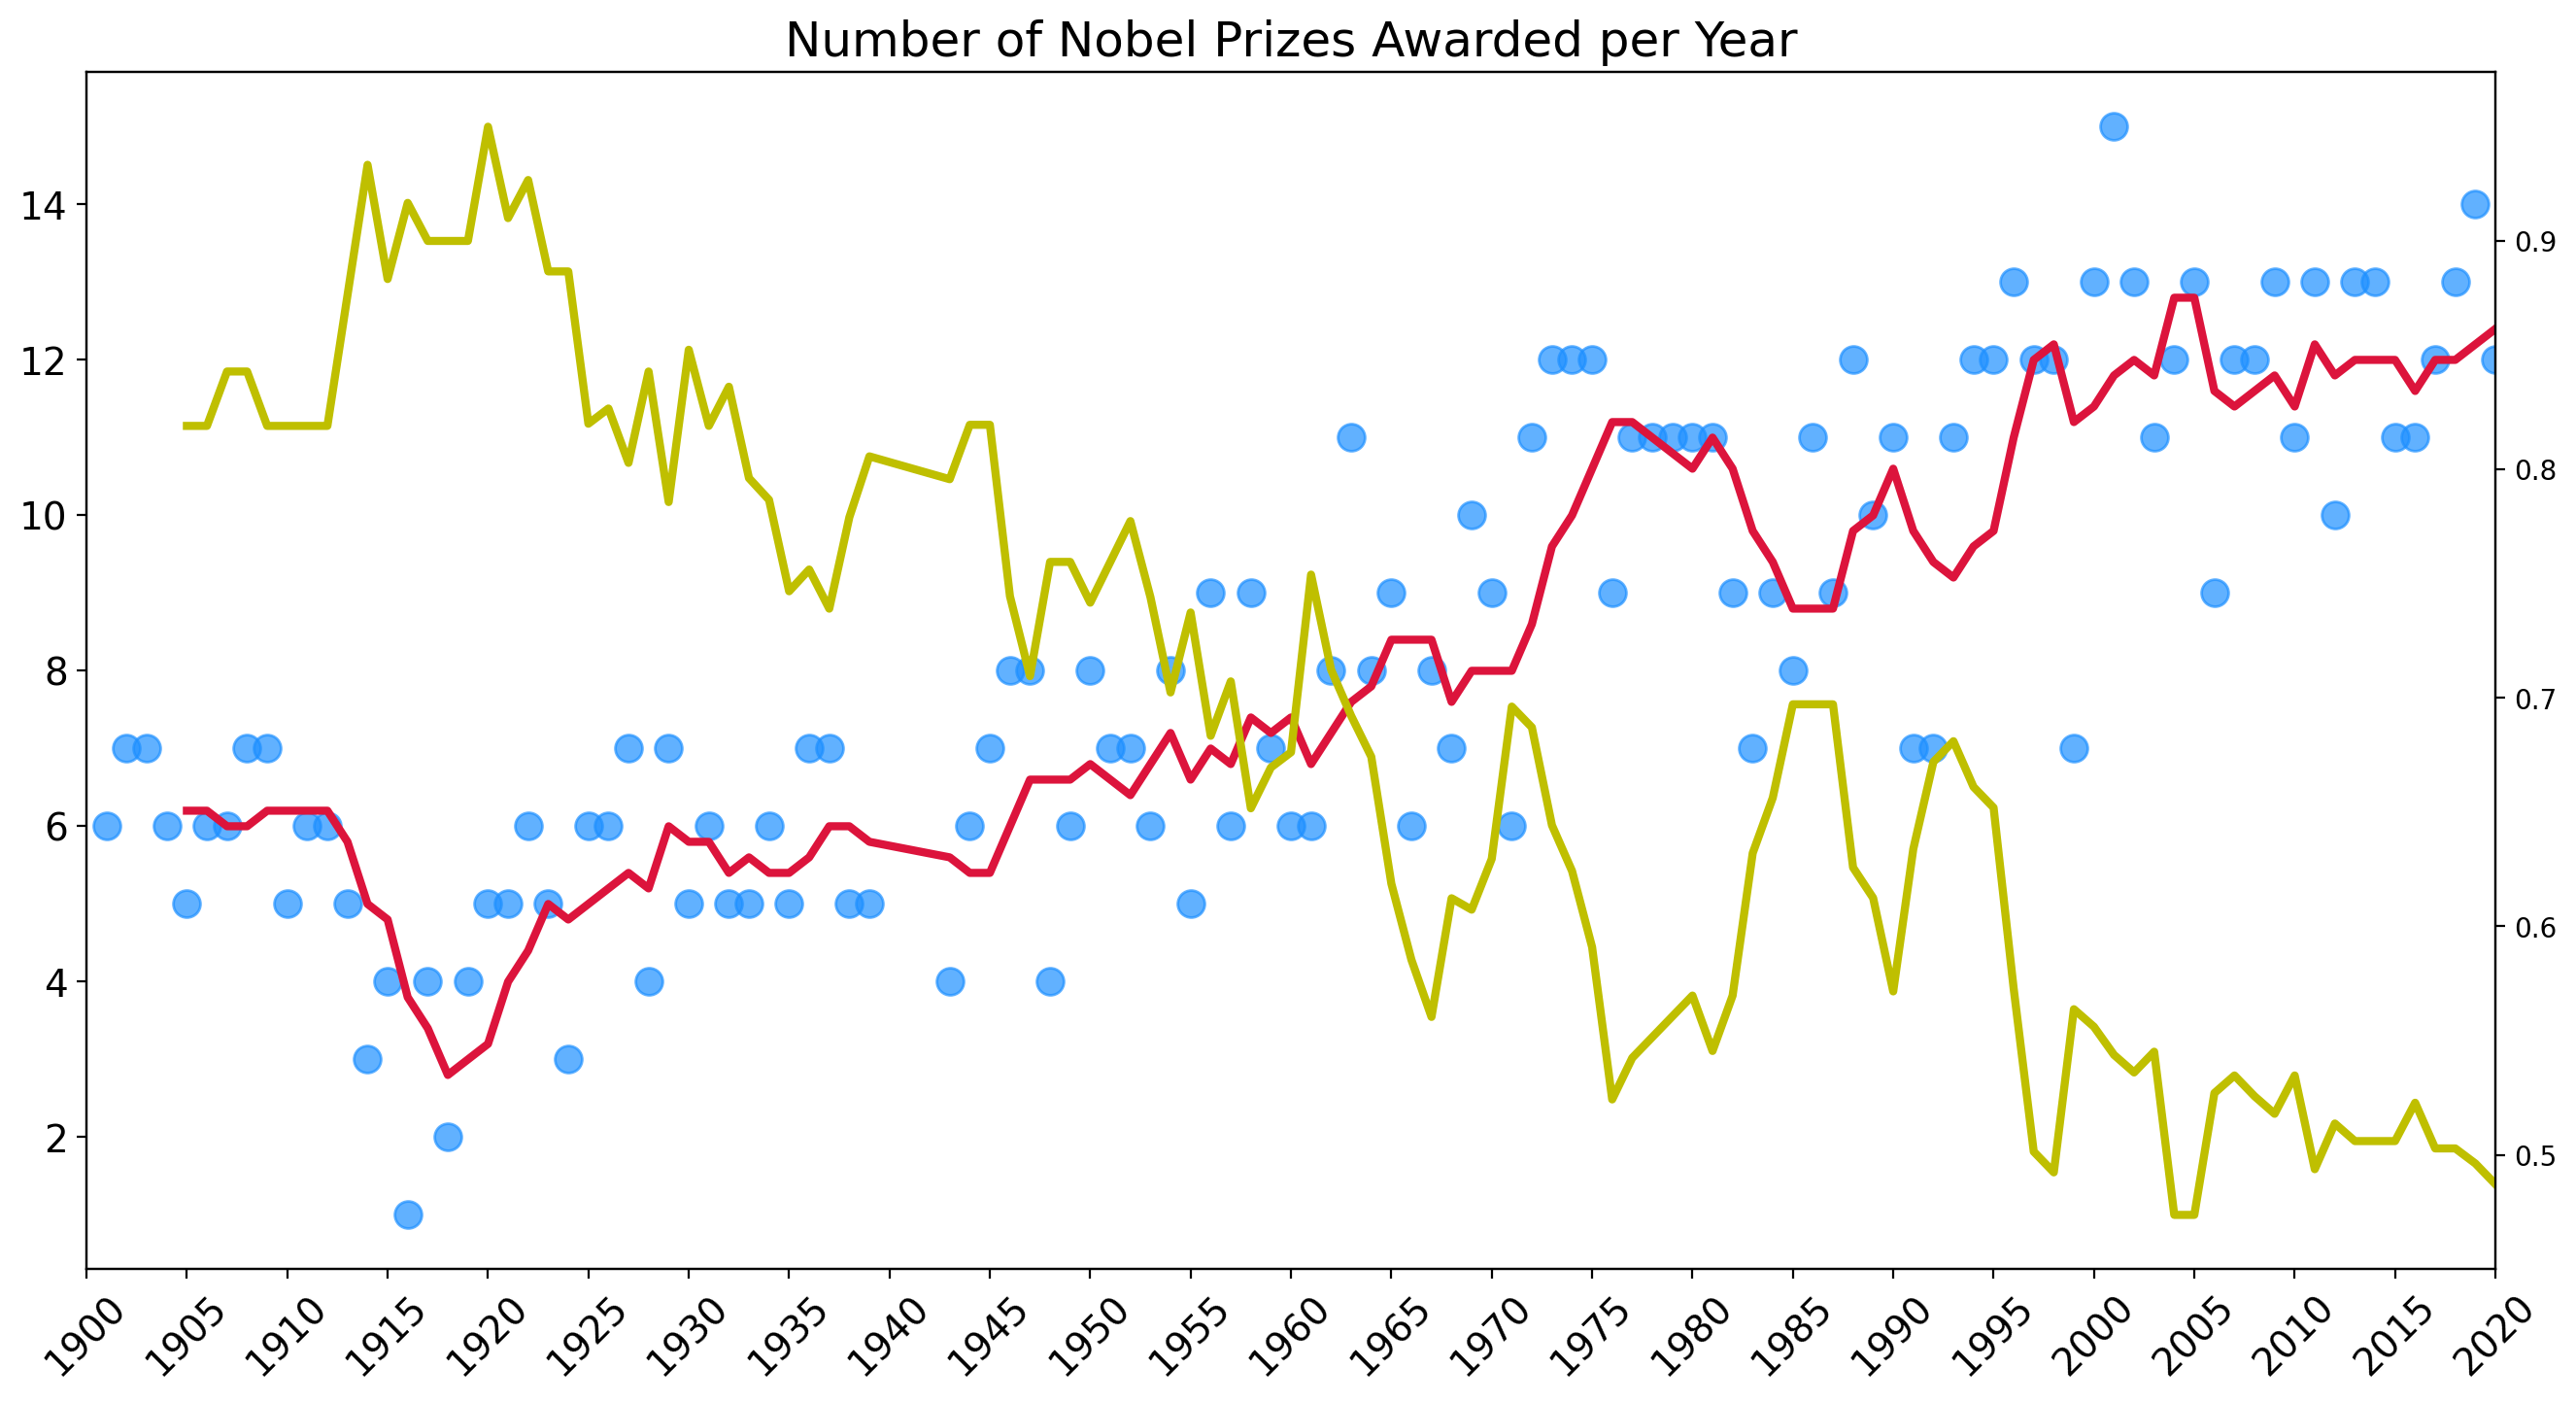

In [65]:
# Plot results
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year2.index, 
           y=prize_per_year2.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year2.index, 
        moving_avg.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year2.index, 
        share_moving_average.values, 
        c='y', 
        linewidth=3,)
 
plt.show()

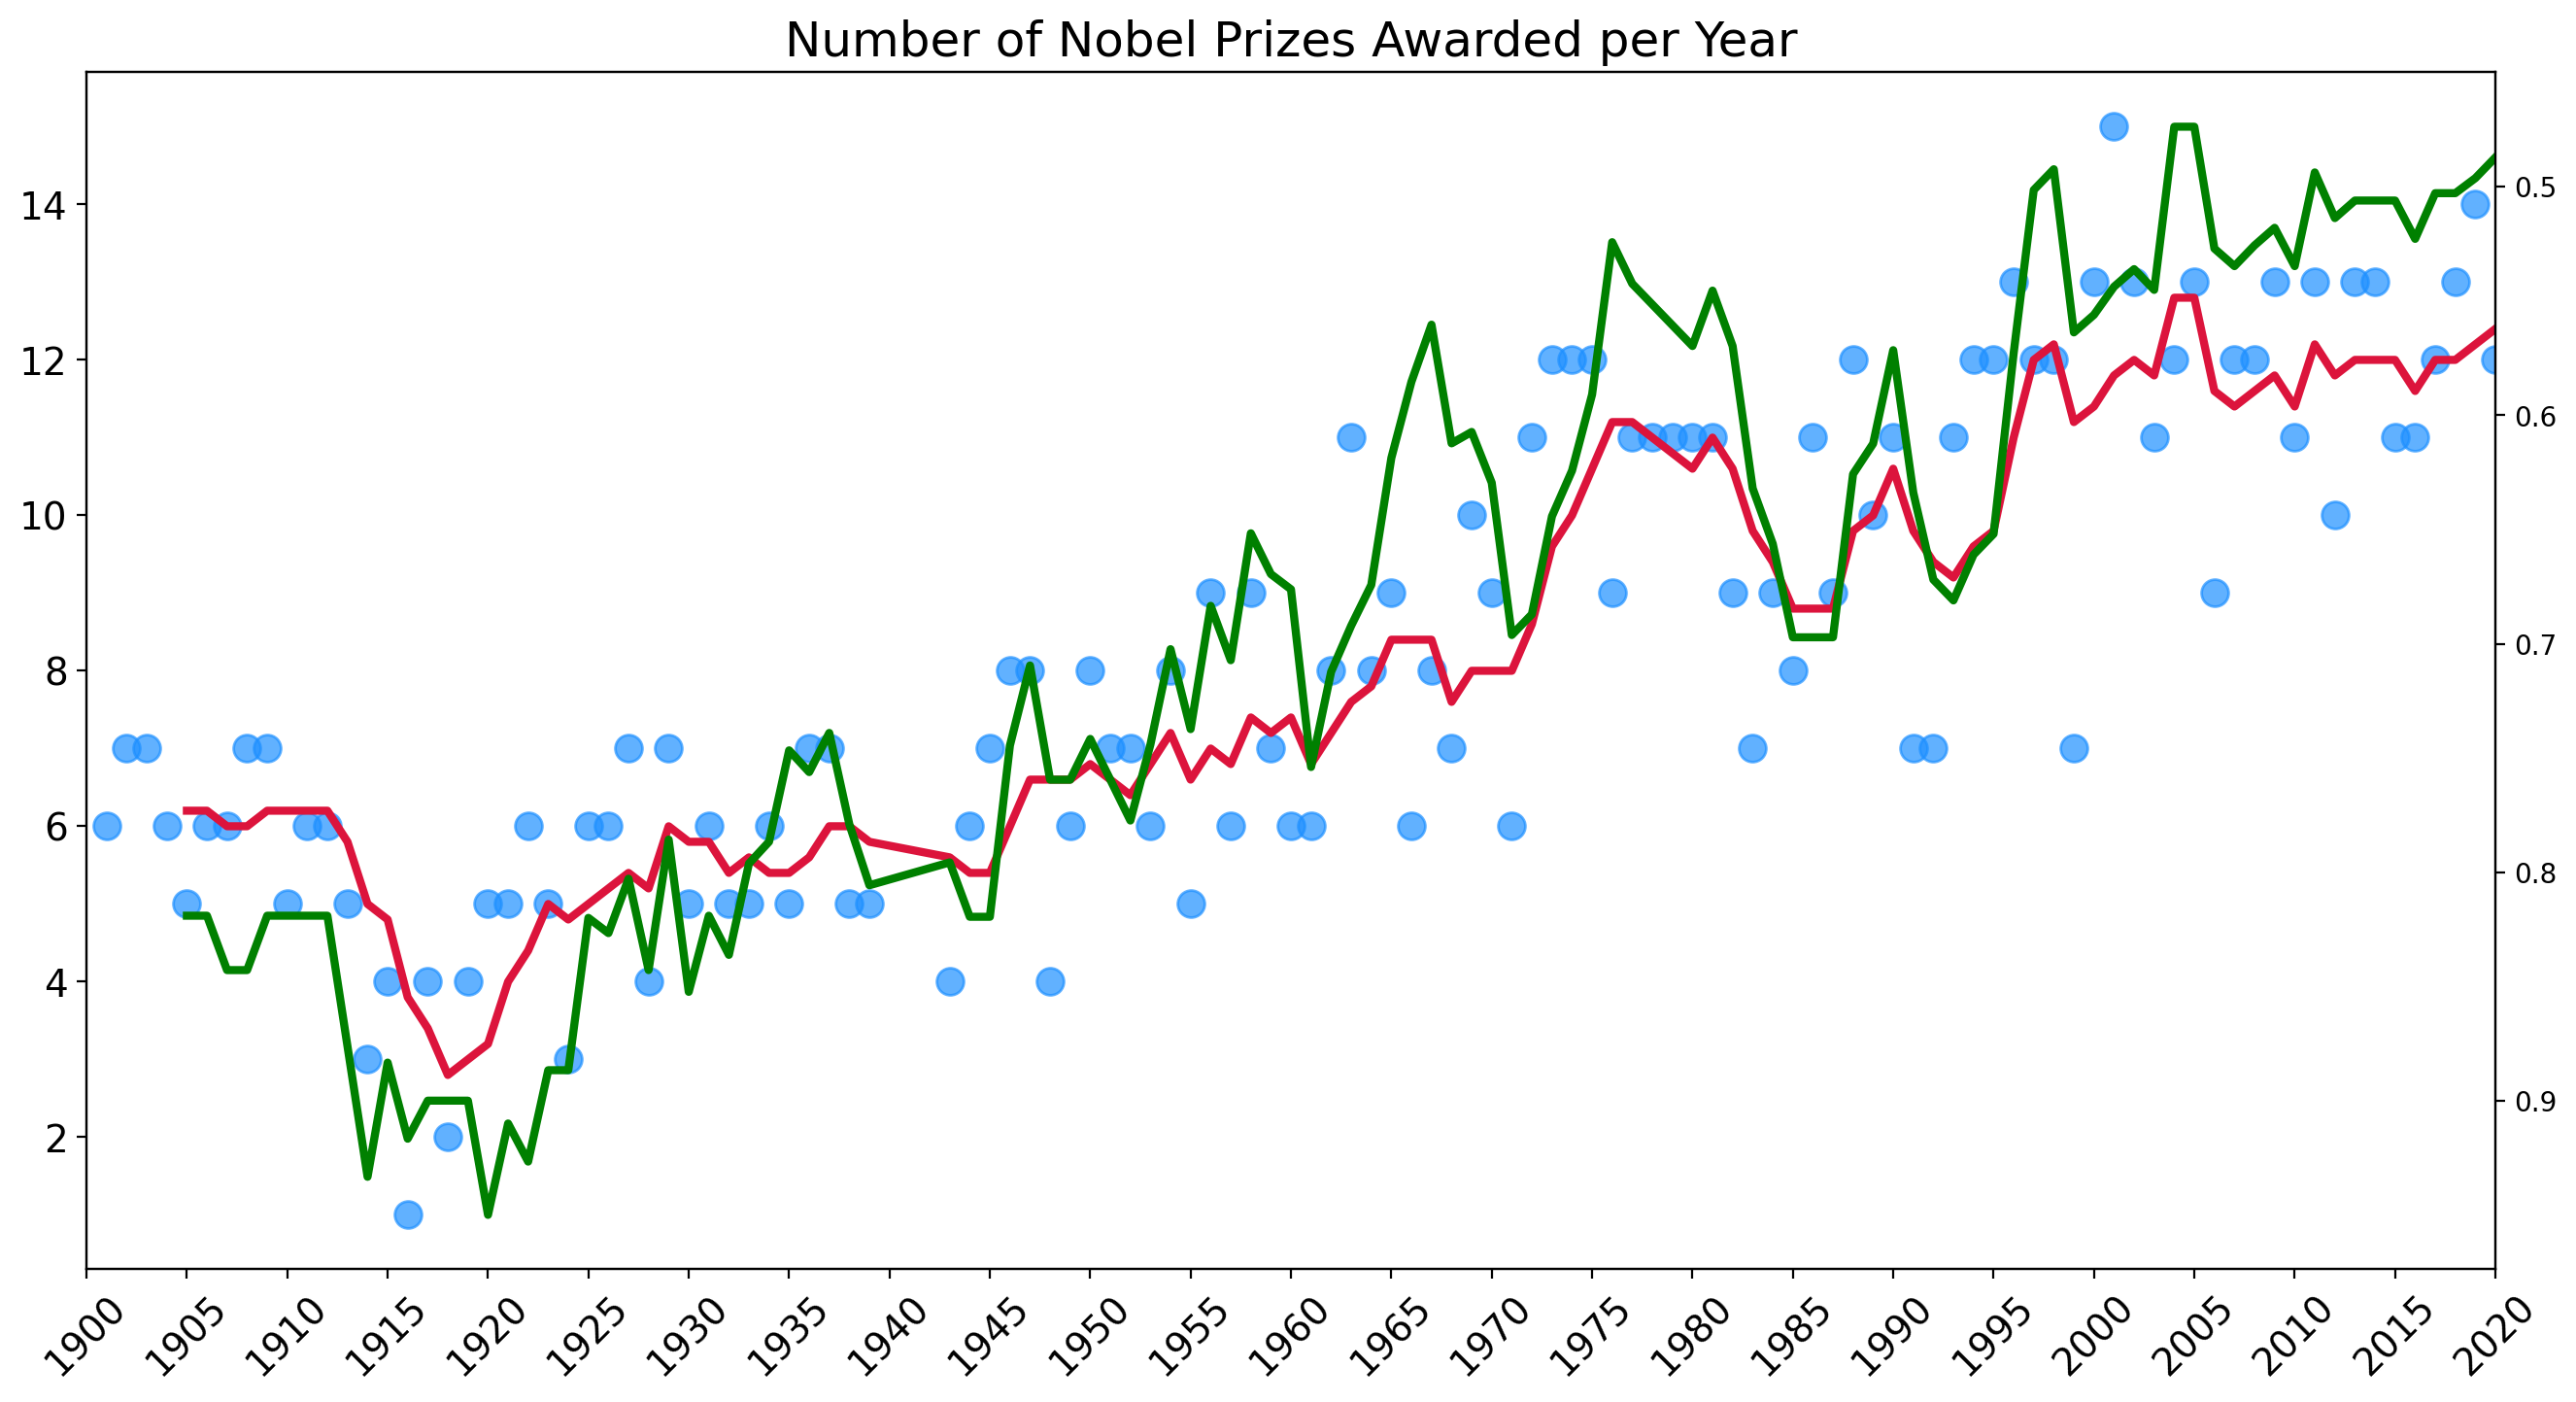

In [67]:
# Inverting the secondary y-axis to make the relationship even more clear
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
# Can invert axis
ax2.invert_yaxis()
 
ax1.scatter(x=prize_per_year2.index, 
           y=prize_per_year2.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year2.index, 
        moving_avg.values, 
        c='crimson', 
        linewidth=3,)
 
ax2.plot(prize_per_year2.index, 
        share_moving_average.values, 
        c='green',
        linewidth=3,)
 
plt.show()

There is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.



# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [100]:
# Creating Pandas DataFrame
#note It is best to use "birth_country_current" because some of them dont have "organization_country" and some are born in different named countries (e.g. Yugoslavia is now Serbia, Croatia, Montenegro, Slovenia, Bosnia and Herzegovina, Macedonia).
top_countries = df_data.groupby(['birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
top_countries.sort_values(by='prize', inplace=True)
print(f"There are {len(top_countries)} countries that have Nobel prize laureates.")
top20_countries = top_countries[-20:]

top20_countries

There are 79 countries that have Nobel prize laureates.


,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [126]:
# Horizontal bar plot
h_bar = px.bar(
    x=top20_countries.prize,
    y=top20_countries.birth_country_current,
    orientation="h",
    title="Top 20 Countries by Number of Prizes",
    color=top20_countries.prize,
    color_continuous_scale='Viridis',
)

h_bar.update_layout(
    xaxis_title="Number of Prizes",
    yaxis_title="Country",
    coloraxis_showscale=False,
    height=600,  # Adjust the figure height as needed
    # yaxis = dict(
    #     tickfont=dict(size=10)  # Adjust the font size here
    # )

)
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [129]:
# Creating DataFrame for all countries
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)
df_countries.sample(5)

,birth_country_current,ISO,prize
69,Taiwan,SYR,1
28,Greece,GRC,1
19,Democratic Republic of the Congo,COD,1
45,Lithuania,LTU,3
2,Australia,AUS,10


In [130]:
# Creating choropleth
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [139]:
# Create DF of number of prizes in each category in each country
cat_country = df_data.groupby(["birth_country_current", "category"], as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [145]:
# Merging DF cat_country that have number of prizes per category with DF top20_countries that have columns for number of prizes per country
merged_df = pd.merge(cat_country, top20_countries, on="birth_country_current")

# Change name of columns
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
77,Hungary,Medicine,2,9
71,Hungary,Physics,2,9
68,India,Medicine,2,9
67,India,Literature,2,9
...,...,...,...,...
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281
19,United States of America,Literature,10,281


In [147]:
#  Create our bar chart again
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country',
                            height=600,)
cat_cntry_bar.show()


US has won an incredible proportion of the prizes in the field of Economics. In comparison, Japan and Germany have won very few or no economics prize at all. Also, the US has more prizes in physics or medicine alone than all of France's prizes combined. On the chart, we also see that Germany won more prizes in physics than the UK and that France has won more prizes in peace and literature than Germany, even though Germany has been awarded a higher total number of prizes than France.

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [149]:
# Calculate the number of prizes won by each country per year
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [151]:
# Create a series that has the cumulative sum (cumsum()) for the number of prizes won.
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [152]:
# Creating chart
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

What we see is that the United States really started to take off after the Second World War which decimated Europe. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too. Perhaps this reflects a little bit of home bias?

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [153]:
# Top 20 organizations
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
top20_orgs

organization_name
Sorbonne University                              7
Harvard Medical School                           7
Institut Pasteur                                 7
London University                                7
Bell Laboratories                                8
Cornell University                               8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
California Institute of Technology (Caltech)    17
Columbia University                             17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of

In [154]:
# Creating Chart
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')
 
org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False,
                      height=600)
org_bar.show() 

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [155]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
top20_org_cities

organization_city
Ithaca, NY          8
Los Angeles, CA     8
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Moscow             10
Stockholm          10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: count, dtype: int64

In [156]:
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False,
                       height = 600)
city_bar2.show()
#note Cambridge Massachusets and New York in the United States lead the pack... :)

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [157]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
top20_cities

birth_city
Ann Arbor, MI             3
Montreal                  4
Cairo                     4
Pittsburgh, PA            4
Prague                    5
Frankfurt-on-the-Main     5
Hamburg                   6
Stockholm                 6
Moscow                    7
Munich                    7
Budapest                  8
Brooklyn, NY              8
Washington, DC            8
Boston, MA                8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: count, dtype: int64

In [159]:
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False,
                       height = 600)
city_bar.show()

A higher population definitely means that there's a higher chance of a Nobel laureate to be born there. New York, Paris, and London are all very populous. However, Vienna and Budapest are not and still produced many prize winners. That said, much of the ground-breaking research does not take place in big population centres, so the list of birth cities is quite different from the list above. Cambridge Massachusets, Stanford, Berkely and Cambridge (UK) are all the places where many discoveries are made, but they are not the birthplaces of laureates.

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [160]:
# DF that groups the number of prizes by organisation
country_city_org = df_data.groupby(by=['organization_country','organization_city','organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [171]:
# Creating sunburst chart
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False,
                    height = 1300,)
 
burst.show()

France is a great example of concentration. Practically all the organisations affiliated with Nobel prize winners are in Paris. In contrast, scientific discoveries are much more spread out across Germany. Meanwhile, the UK is dominated by Cambridge and London.

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [172]:
birth_years = df_data.birth_date.dt.year
birth_years

0     1,852.00
1     1,839.00
2     1,854.00
3     1,822.00
4     1,828.00
        ...   
957   1,949.00
958        NaN
959   1,965.00
960   1,952.00
961   1,931.00
Name: birth_date, Length: 962, dtype: float64

In [175]:
df_data['winning_age'] = df_data.year - birth_years
df_data.sample(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
395,1969,Literature,The Nobel Prize in Literature 1969,"""for his writing, which - in new forms for the...",1/1,Individual,Samuel Beckett,1906-04-13,Dublin,Ireland,Ireland,Male,NaN,NaN,NaN,IRL,1.00,63.00
803,2007,Physics,The Nobel Prize in Physics 2007,"""for the discovery of Giant Magnetoresistance""",1/2,Individual,Peter Grünberg,1939-05-18,Plzen,Czechoslovakia (Czech Republic),Czech Republic,Male,Forschungszentrum J&uuml;lich,J&uuml;lich,Germany,CZE,0.50,68.00
390,1968,Physics,The Nobel Prize in Physics 1968,"""for his decisive contributions to elementary ...",1/1,Individual,Luis Walter Alvarez,1911-06-13,"San Francisco, CA",United States of America,United States of America,Male,University of California,"Berkeley, CA",United States of America,USA,1.00,57.00
611,1990,Physics,The Nobel Prize in Physics 1990,"""for their pioneering investigations concernin...",1/3,Individual,Jerome I. Friedman,1930-03-28,"Chicago, IL",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,0.33,60.00
337,1962,Medicine,The Nobel Prize in Physiology or Medicine 1962,"""for their discoveries concerning the molecula...",1/3,Individual,Francis Harry Compton Crick,1916-06-08,Northampton,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR,0.33,46.00


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [176]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


In [177]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

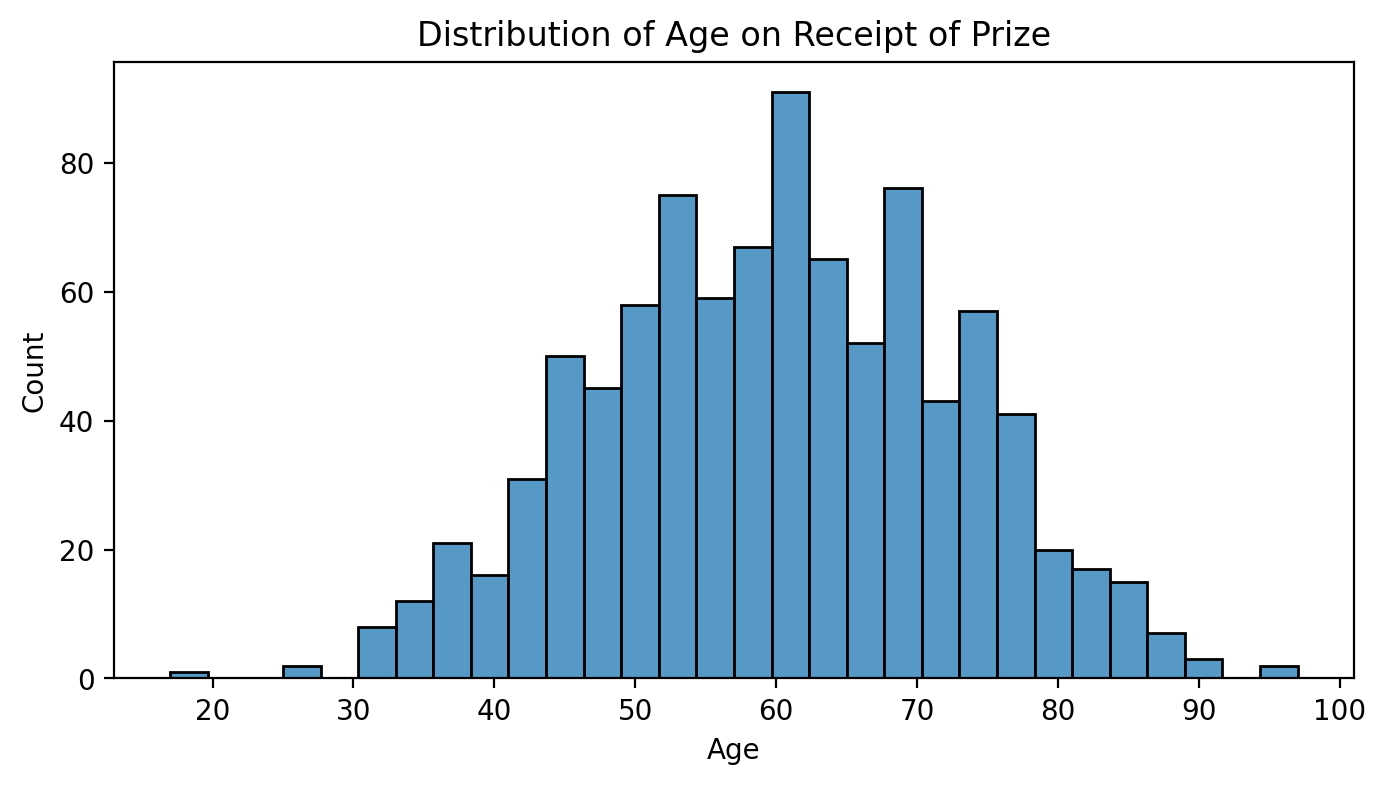

In [184]:
# Histogram
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


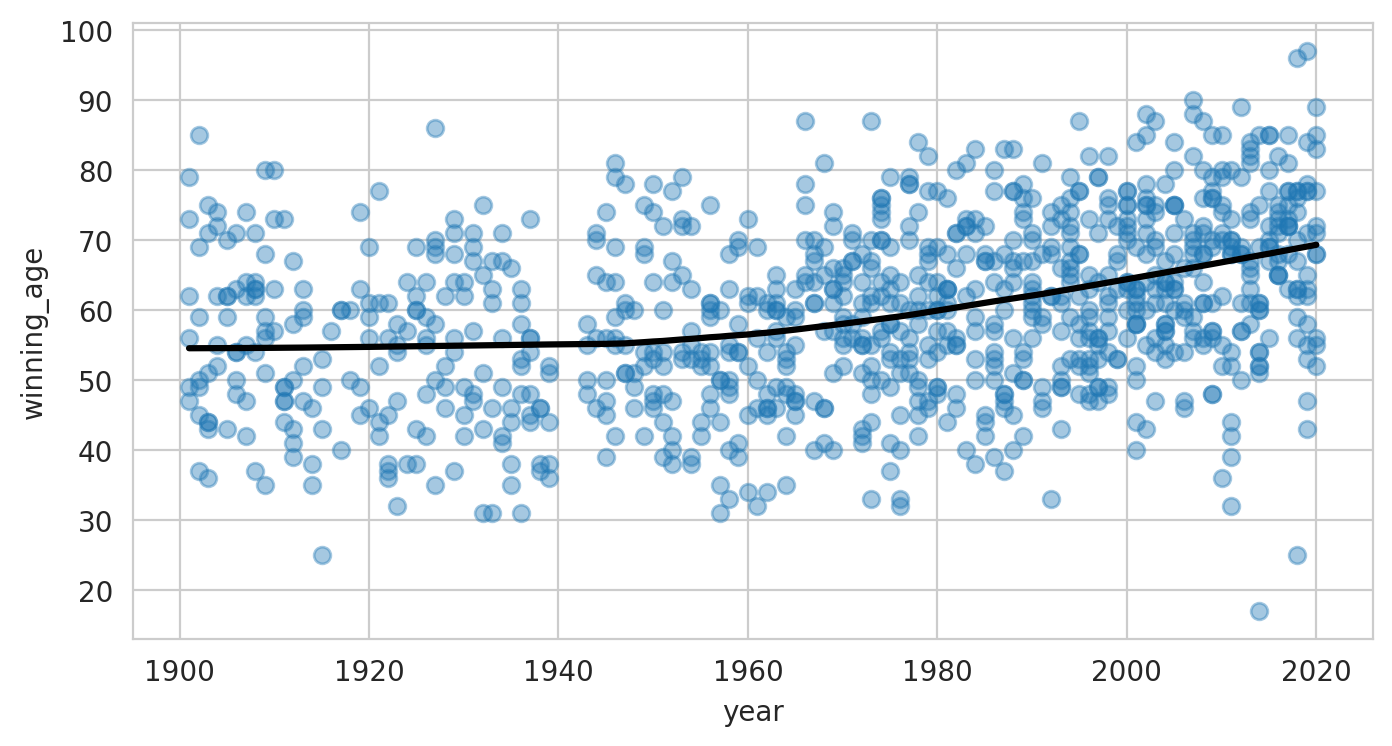

In [185]:
# Create plot with trendline
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()
# Winners are older

Using the lowess parameter allows us to plot a local linear regression. This means the best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

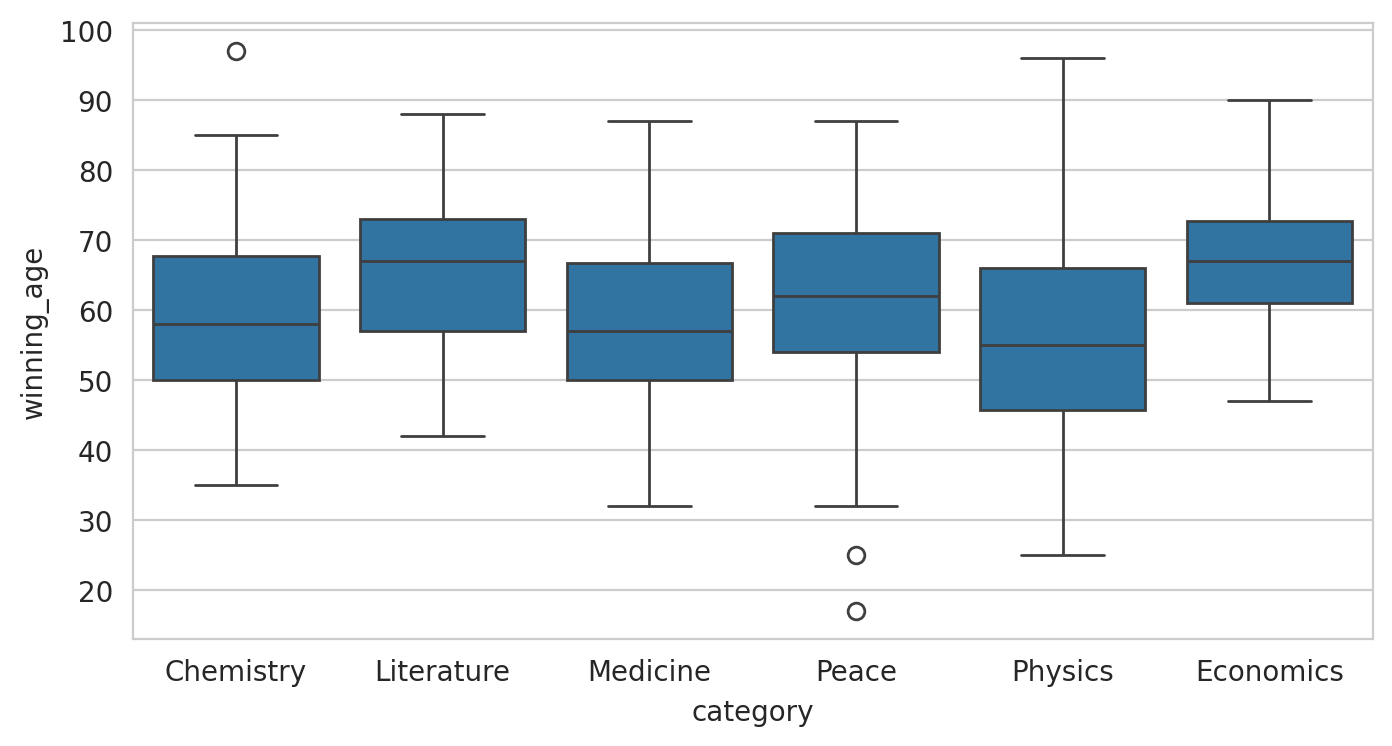

In [186]:
# Usiong boxplots
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

The box plot shows us the mean, the quartiles, the maximum and the minimum values. It raises an interesting question: "Are peace prize winners really older than physics laureates?".

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


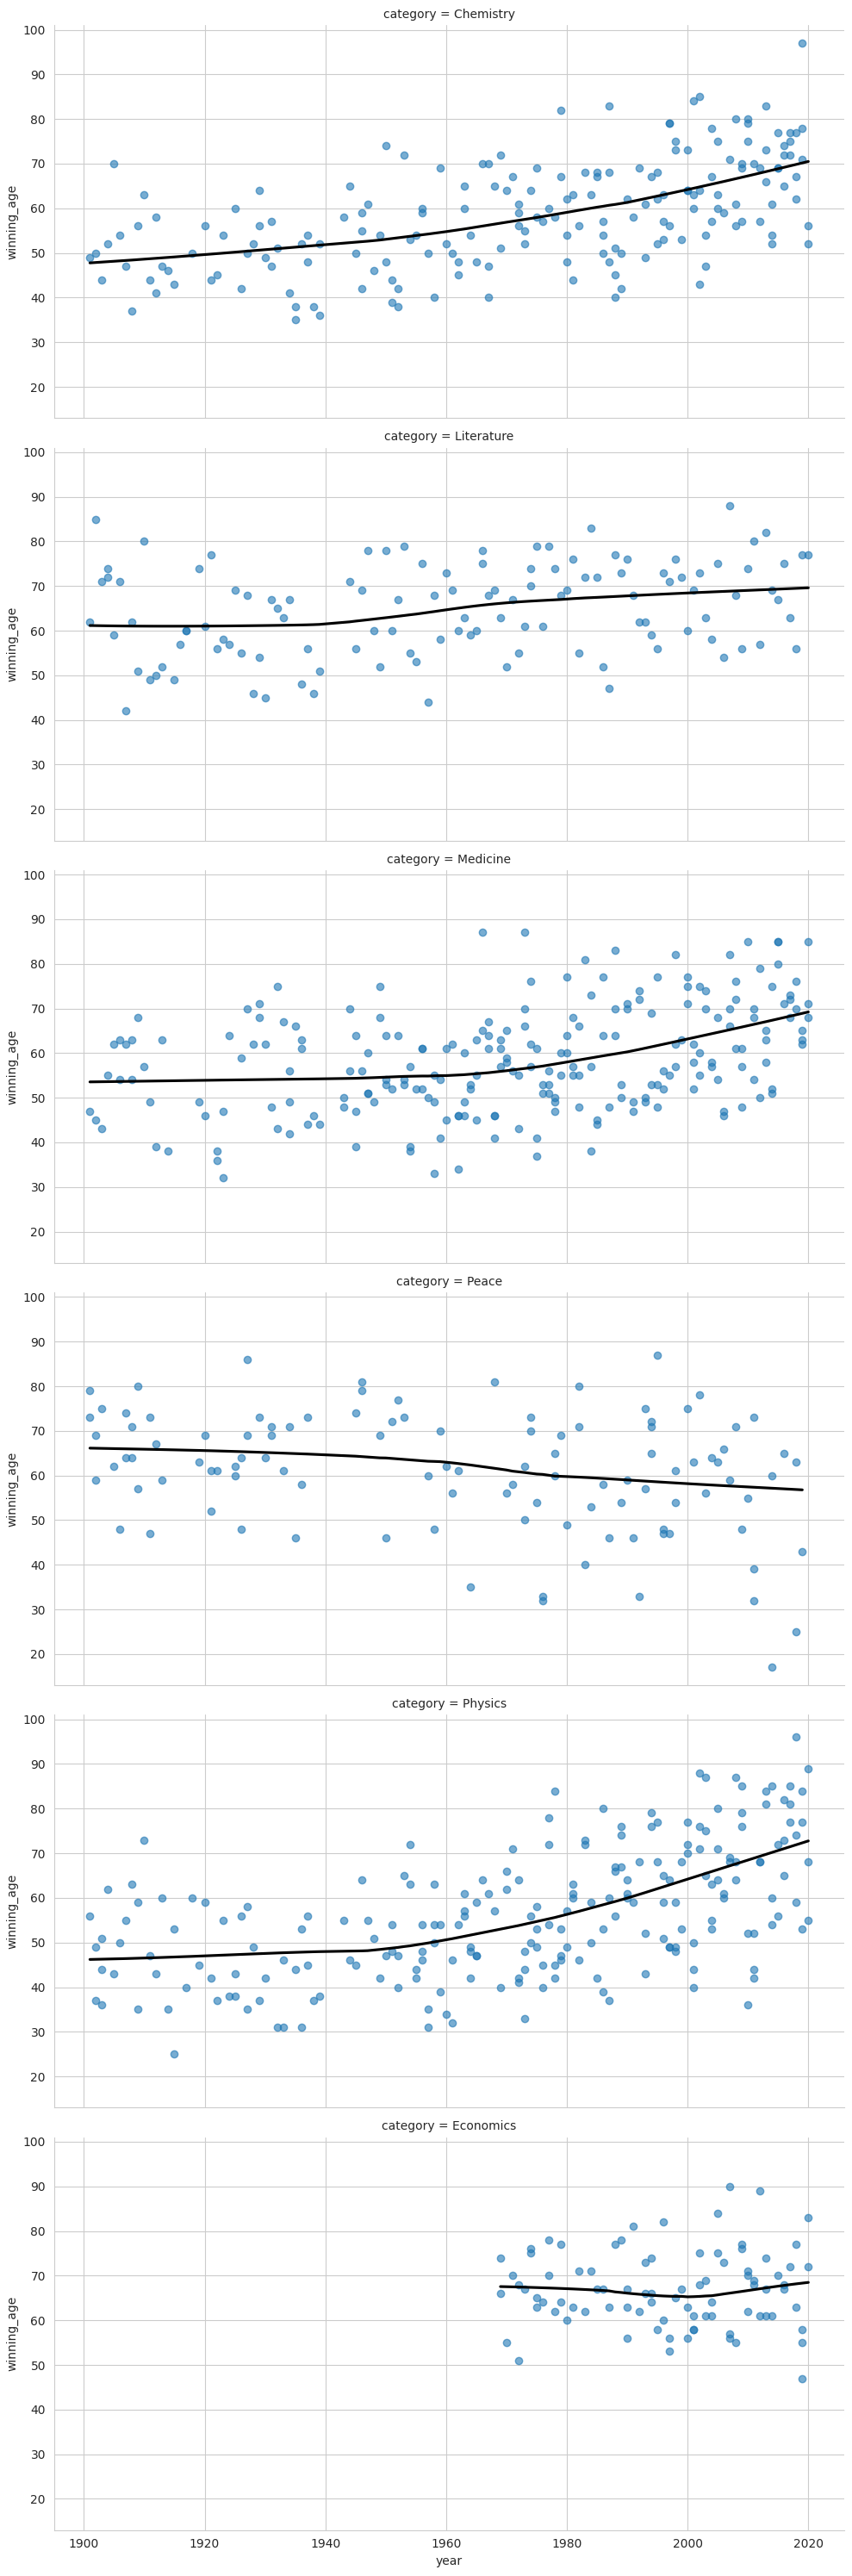

In [187]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

We see that winners in physics, chemistry, and medicine have gotten older over time. The ageing trend is strongest for physics. The average age used to be below 50, but now it's over 70. Economics, the newest category, is much more stable in comparison. The peace prize shows the opposite trend where winners are getting younger! As such, our scatter plots showing the best fit lines over time and our box plot of the entire dataset can tell very different stories!

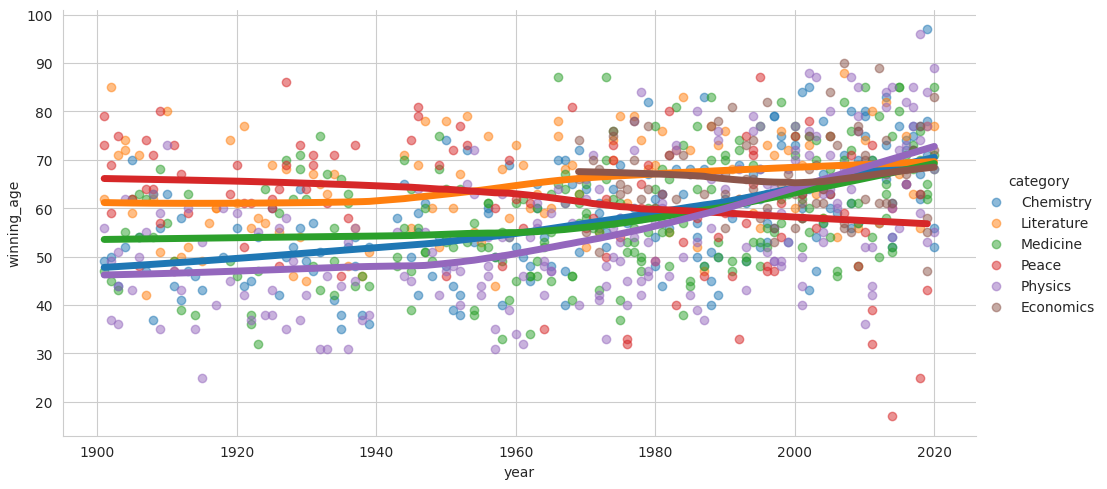

In [188]:
# Combine all this charts together
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()


In this lesson, we reviewed many concepts that we've covered previously, including:

How to uncover and investigate NaN values.

How to convert objects and string data types to numbers.

Creating donut and bar charts with plotly.

Create a rolling average to smooth out time-series data and show a trend.

How to use .value_counts(), .groupby(), .merge(), .sort_values() and .agg().



In addition, we learned many new things too. We looked at how to:

Create a Choropleth to display data on a map.

Create bar charts showing different segments of the data with plotly.

Create Sunburst charts with plotly.

Use Seaborn's .lmplot() and show best-fit lines across multiple categories using the row, hue, and lowess parameters.

Understand how a different picture emerges when looking at the same data in different ways (e.g., box plots vs a time series analysis).

See the distribution of our data and visualise descriptive statistics with the help of a histogram in Seaborn.

